# XGBoost MODEL BUILD

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil  # For measuring system resources
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import joblib
from xgboost import XGBClassifier
from xgboost import plot_importance

# Function to measure CPU, Memory, and Disk I/O usage
def measure_system_resources():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_io = psutil.disk_io_counters()

    memory_used = memory_info.used / (1024 * 1024)  # Convert to MB
    disk_io_used = (disk_io.read_bytes + disk_io.write_bytes) / (1024 * 1024)  # Convert to MB

    return cpu_usage, memory_used, disk_io_used


## Load Train and Test Datasets

In [40]:
# Load datasets
train_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/train.csv')
test_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/test.csv')

# Splitting features and labels
X_train = train_data.drop(['label'], axis=1)  # Features
y_train = train_data['label']  # Target variable
X_test = test_data.drop(['label'], axis=1)  # Features
y_test = test_data['label']  # Target variable


# Splitting Training Set for Validation

In [41]:
# Splitting the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualizing PCA Data

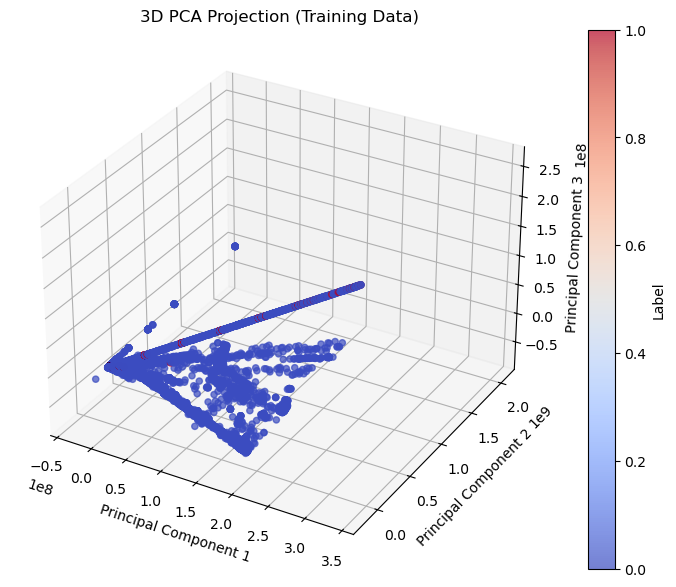

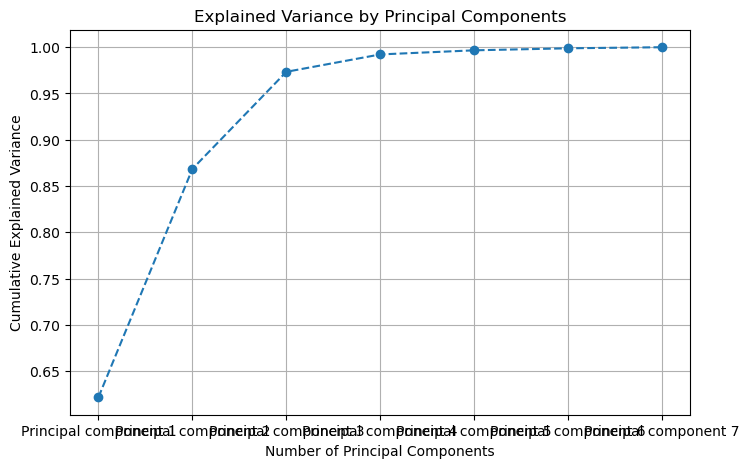

In [42]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], 
    c=y_train, cmap='coolwarm', alpha=0.7
)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection (Training Data)")

plt.colorbar(scatter, ax=ax, label='Label')
plt.show()



# Calculate explained variance ratio manually
explained_variance = np.var(X_train, axis=0) / np.sum(np.var(X_train, axis=0))

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


# Model Creation and Training (XGBoost)

In [43]:
# 'n_estimators' sets the number of boosting rounds.
# 'max_depth' controls the maximum depth of each tree.
# 'learning_rate' determines the step size at each iteration.
# 'objective' defines the loss function to be optimized.
model = XGBClassifier(
    n_estimators=1500,  
    max_depth=5,        
    learning_rate=0.05,  
    objective='binary:logistic'
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
# Validation
pred = model.predict(X_test)

In [45]:
# Start time and system resource tracking
start_time = time.time()
cpu_before, memory_before, disk_io_before = measure_system_resources()

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# End time and resource tracking
end_time = time.time()
cpu_after, memory_after, disk_io_after = measure_system_resources()
execution_time = end_time - start_time

cpu_usage_change = cpu_after - cpu_before
memory_used = memory_after - memory_before
disk_io_used = disk_io_after - disk_io_before

# Report computational overhead
print("\n🚀 **Computational Overhead Report (XGBoost Training)** 🚀")
print(f"⏳ **Execution Time:** {execution_time:.4f} seconds")
print(f"🔥 **CPU Usage Change:** {cpu_usage_change:.2f}%")
print(f"💾 **Disk I/O Usage:** {disk_io_used:.2f} MB")
print(f"📊 **Memory Usage:** {memory_used:.2f} MB")


[0]	validation_0-logloss:0.59374
[1]	validation_0-logloss:0.51775
[2]	validation_0-logloss:0.45424
[3]	validation_0-logloss:0.40065
[4]	validation_0-logloss:0.35488
[5]	validation_0-logloss:0.31563
[6]	validation_0-logloss:0.28171
[7]	validation_0-logloss:0.25191
[8]	validation_0-logloss:0.22574
[9]	validation_0-logloss:0.20274
[10]	validation_0-logloss:0.18246
[11]	validation_0-logloss:0.16454
[12]	validation_0-logloss:0.14859
[13]	validation_0-logloss:0.13444
[14]	validation_0-logloss:0.12175
[15]	validation_0-logloss:0.11045
[16]	validation_0-logloss:0.10026
[17]	validation_0-logloss:0.09121
[18]	validation_0-logloss:0.08310
[19]	validation_0-logloss:0.07579
[20]	validation_0-logloss:0.06918
[21]	validation_0-logloss:0.06333
[22]	validation_0-logloss:0.05798
[23]	validation_0-logloss:0.05326
[24]	validation_0-logloss:0.04902
[25]	validation_0-logloss:0.04515
[26]	validation_0-logloss:0.04159
[27]	validation_0-logloss:0.03841
[28]	validation_0-logloss:0.03546
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00713
[239]	validation_0-logloss:0.00713
[240]	validation_0-logloss:0.00712
[241]	validation_0-logloss:0.00712
[242]	validation_0-logloss:0.00712
[243]	validation_0-logloss:0.00711
[244]	validation_0-logloss:0.00711
[245]	validation_0-logloss:0.00711
[246]	validation_0-logloss:0.00712
[247]	validation_0-logloss:0.00712
[248]	validation_0-logloss:0.00712
[249]	validation_0-logloss:0.00712
[250]	validation_0-logloss:0.00712
[251]	validation_0-logloss:0.00711
[252]	validation_0-logloss:0.00711
[253]	validation_0-logloss:0.00711
[254]	validation_0-logloss:0.00712
[255]	validation_0-logloss:0.00711
[256]	validation_0-logloss:0.00711
[257]	validation_0-logloss:0.00711
[258]	validation_0-logloss:0.00711
[259]	validation_0-logloss:0.00711
[260]	validation_0-logloss:0.00711
[261]	validation_0-logloss:0.00710
[262]	validation_0-logloss:0.00710
[263]	validation_0-logloss:0.00710
[264]	validation_0-logloss:0.00710
[265]	validation_0-logloss:0.00710
[266]	validation_0-l

[473]	validation_0-logloss:0.00711
[474]	validation_0-logloss:0.00712
[475]	validation_0-logloss:0.00712
[476]	validation_0-logloss:0.00711
[477]	validation_0-logloss:0.00711
[478]	validation_0-logloss:0.00712
[479]	validation_0-logloss:0.00712
[480]	validation_0-logloss:0.00712
[481]	validation_0-logloss:0.00711
[482]	validation_0-logloss:0.00711
[483]	validation_0-logloss:0.00712
[484]	validation_0-logloss:0.00713
[485]	validation_0-logloss:0.00713
[486]	validation_0-logloss:0.00712
[487]	validation_0-logloss:0.00712
[488]	validation_0-logloss:0.00711
[489]	validation_0-logloss:0.00711
[490]	validation_0-logloss:0.00711
[491]	validation_0-logloss:0.00711
[492]	validation_0-logloss:0.00711
[493]	validation_0-logloss:0.00711
[494]	validation_0-logloss:0.00711
[495]	validation_0-logloss:0.00711
[496]	validation_0-logloss:0.00712
[497]	validation_0-logloss:0.00713
[498]	validation_0-logloss:0.00713
[499]	validation_0-logloss:0.00713

🚀 **Computational Overhead Report (XGBoost Training)**

# Validate the Model

In [46]:
# Predict on validation set
y_val_pred = xgb_model.predict(X_val)

# Compute validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

# Display validation results
print("\n🚀 **Validation Results:**")
print(f"✅ Accuracy:   {val_accuracy:.2%}")
print(f"✅ Precision:  {val_precision:.2%}")
print(f"✅ Recall:     {val_recall:.2%}")
print(f"✅ F1-score:   {val_f1:.2%}")



🚀 **Validation Results:**
✅ Accuracy:   99.77%
✅ Precision:  99.78%
✅ Recall:     99.81%
✅ F1-score:   99.80%


# Test the Model

In [47]:
# Start time and resource tracking
start_time = time.time()
cpu_before, memory_before, disk_io_before = measure_system_resources()

# Predict on test set
y_test_pred = xgb_model.predict(X_test)

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# End time and resource tracking
end_time = time.time()
cpu_after, memory_after, disk_io_after = measure_system_resources()
execution_time = end_time - start_time

cpu_usage_change = cpu_after - cpu_before
memory_used = memory_after - memory_before
disk_io_used = disk_io_after - disk_io_before

# Display test results
print("\n🚀 **Test Results:**")
print(f"✅ Accuracy:   {test_accuracy:.2%}")
print(f"✅ Precision:  {test_precision:.2%}")
print(f"✅ Recall:     {test_recall:.2%}")
print(f"✅ F1-score:   {test_f1:.2%}")

# Report computational overhead
print("\n🚀 **Computational Overhead Report (XGBoost Testing)** 🚀")
print(f"⏳ **Execution Time:** {execution_time:.4f} seconds")
print(f"🔥 **CPU Usage Change:** {cpu_usage_change:.2f}%")
print(f"💾 **Disk I/O Usage:** {disk_io_used:.2f} MB")
print(f"📊 **Memory Usage:** {memory_used:.2f} MB")



🚀 **Test Results:**
✅ Accuracy:   99.72%
✅ Precision:  99.75%
✅ Recall:     99.74%
✅ F1-score:   99.75%

🚀 **Computational Overhead Report (XGBoost Testing)** 🚀
⏳ **Execution Time:** 1.0938 seconds
🔥 **CPU Usage Change:** 18.80%
💾 **Disk I/O Usage:** 0.70 MB
📊 **Memory Usage:** 22.46 MB


In [48]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy:   {:.2%}".format(accuracy))
print("Precision:  {:.2%}".format(precision))
print("Recall:     {:.2%}".format(recall))
print("F1-score:   {:.2%}".format(f1))

Accuracy:   99.75%
Precision:  99.76%
Recall:     99.79%
F1-score:   99.77%


# Visualizing Feature Importance

<Figure size 1000x600 with 0 Axes>

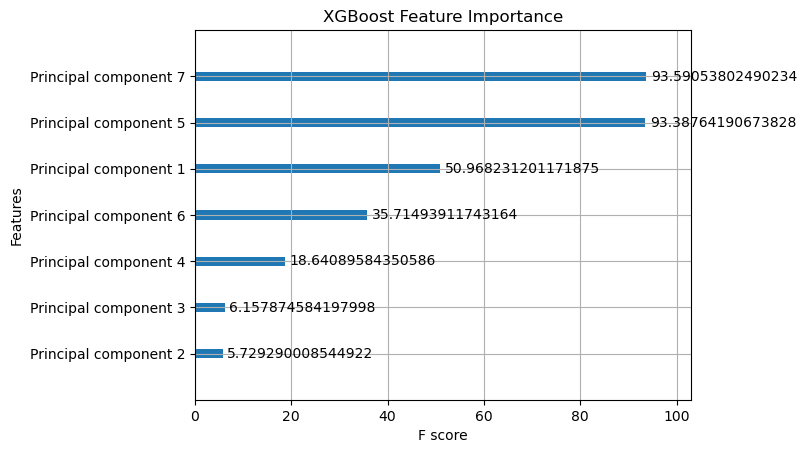

In [49]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain', title="XGBoost Feature Importance")
plt.show()


# Confusion Matrix & Classification Report

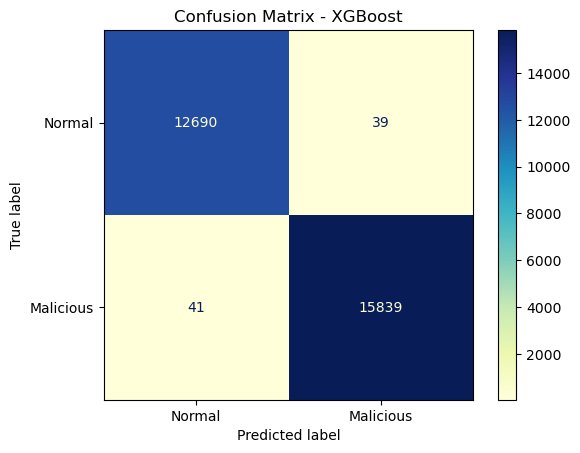


🚀 **Classification Report:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12729
           1       1.00      1.00      1.00     15880

    accuracy                           1.00     28609
   macro avg       1.00      1.00      1.00     28609
weighted avg       1.00      1.00      1.00     28609



In [50]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Malicious'])
disp.plot(cmap='YlGnBu', values_format='d')

plt.title("Confusion Matrix - XGBoost")
plt.show()

# Print classification report
print("\n🚀 **Classification Report:**")
print(classification_report(y_test, y_test_pred))


# Save the Trained XGBoost Model

In [51]:
# Save the trained model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/"
model_filename = "CICIDS-2017_XGBoost.joblib"
model_path = model_folder + model_filename
joblib.dump(xgb_model, model_path)

print(f"🚀 **XGBoost model saved to:** {model_path}")


🚀 **XGBoost model saved to:** ../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/CICIDS-2017_XGBoost.joblib
